In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joypy
from pandas.plotting import table 
from scipy.stats import linregress
from scipy.stats import describe
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [70]:
file = "/Users/mdcummings/Desktop/Data Analysis/Boot Camp/Project 4/Project 4/Project 4/project-4-repository/Resources/Combined_Flights_2022.csv"

In [71]:
df = pd.read_csv(file)


In [72]:
list(df.head(10))

['FlightDate',
 'Airline',
 'Origin',
 'Dest',
 'Cancelled',
 'Diverted',
 'CRSDepTime',
 'DepTime',
 'DepDelayMinutes',
 'DepDelay',
 'ArrTime',
 'ArrDelayMinutes',
 'AirTime',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'Distance',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Marketing_Airline_Network',
 'Operated_or_Branded_Code_Share_Partners',
 'DOT_ID_Marketing_Airline',
 'IATA_Code_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'Operating_Airline',
 'DOT_ID_Operating_Airline',
 'IATA_Code_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRS

In [73]:
len(df)

4078318

In [74]:
#sort values by flight 
sorted_df = df.sort_values('FlightDate')
sorted_df.tail(5)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
1460616,2022-07-31,American Airlines Inc.,LAX,MIA,False,False,625,623.0,0.0,-2.0,...,641.0,1436.0,9.0,1450,-5.0,0.0,-1.0,1400-1459,10,0
1397041,2022-07-31,Spirit Air Lines,CLE,MCO,False,False,1830,1824.0,0.0,-6.0,...,1838.0,2035.0,8.0,2100,-17.0,0.0,-2.0,2100-2159,4,0
1678994,2022-07-31,Southwest Airlines Co.,AUS,MCO,False,False,1615,1616.0,1.0,1.0,...,1624.0,1940.0,13.0,1950,3.0,0.0,0.0,1900-1959,4,0
1513102,2022-07-31,Capital Cargo International,PHL,LEX,False,False,1530,1521.0,0.0,-9.0,...,1553.0,1719.0,4.0,1723,0.0,0.0,0.0,1700-1759,3,0
1377864,2022-07-31,Envoy Air,ALO,ORD,False,False,1829,1818.0,0.0,-11.0,...,1830.0,1915.0,14.0,1945,-16.0,0.0,-2.0,1900-1959,1,0


In [75]:
# Understand the data types in each column
df.dtypes

FlightDate             object
Airline                object
Origin                 object
Dest                   object
Cancelled                bool
                       ...   
ArrDel15              float64
ArrivalDelayGroups    float64
ArrTimeBlk             object
DistanceGroup           int64
DivAirportLandings      int64
Length: 61, dtype: object

In [76]:
# Describe the data
df.describe()


,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,...,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings
count,4.078318e+06,3.957885e+06,3.957823e+06,3.957823e+06,3.954079e+06,3.944916e+06,3.944916e+06,4.078318e+06,3.944916e+06,4.078318e+06,...,3.955652e+06,3.955652e+06,3.954076e+06,3.954076e+06,4.078318e+06,3.944916e+06,3.944916e+06,3.944916e+06,4.078318e+06,4.078318e+06
mean,1.329587e+03,1.334374e+03,1.601494e+01,1.309049e+01,1.457886e+03,1.578307e+01,1.110075e+02,1.413211e+02,1.358624e+02,7.978657e+02,...,1.697375e+01,1.356576e+03,1.455073e+03,7.894387e+00,1.486058e+03,7.528486e+00,2.164715e-01,-6.256103e-02,3.663516e+00,3.685098e-03
std,4.904801e+02,5.056219e+02,5.231498e+01,5.332016e+01,5.431841e+02,5.198424e+01,6.996246e+01,7.179635e+01,7.185501e+01,5.914742e+02,...,9.495407e+00,5.075580e+02,5.378428e+02,6.663118e+00,5.185078e+02,5.524625e+01,4.118393e-01,2.487442e+00,2.320848e+00,1.141331e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,-7.800000e+01,1.000000e+00,0.000000e+00,8.000000e+00,-4.800000e+01,1.400000e+01,3.100000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+02,0.000000e+00,-2.000000e+00,1.000000e+00,0.000000e+00
25%,9.140000e+02,9.170000e+02,0.000000e+00,-5.000000e+00,1.046000e+03,0.000000e+00,6.000000e+01,8.900000e+01,8.300000e+01,3.680000e+02,...,1.100000e+01,9.320000e+02,1.044000e+03,4.000000e+00,1.103000e+03,-1.400000e+01,0.000000e+00,-1.000000e+00,2.000000e+00,0.000000e+00
50%,1.320000e+03,1.325000e+03,0.000000e+00,-2.000000e+00,1.500000e+03,0.000000e+00,9.400000e+01,1.240000e+02,1.190000e+02,6.430000e+02,...,1.500000e+01,1.338000e+03,1.456000e+03,6.000000e+00,1.513000e+03,-5.000000e+00,0.000000e+00,-1.000000e+00,3.000000e+00,0.000000e+00
75%,1.735000e+03,1.744000e+03,1.100000e+01,1.100000e+01,1.914000e+03,1.000000e+01,1.410000e+02,1.710000e+02,1.670000e+02,1.035000e+03,...,1.900000e+01,1.758000e+03,1.909000e+03,9.000000e+00,1.920000e+03,1.000000e+01,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00
max,2.359000e+03,2.400000e+03,7.223000e+03,7.223000e+03,2.400000e+03,7.232000e+03,7.270000e+02,6.900000e+02,7.640000e+02,5.095000e+03,...,2.210000e+02,2.400000e+03,2.400000e+03,2.900000e+02,2.359000e+03,7.232000e+03,1.000000e+00,1.200000e+01,1.100000e+01,9.000000e+00


In [77]:
# How many null values in each column?
df.isnull().sum()

FlightDate                 0
Airline                    0
Origin                     0
Dest                       0
Cancelled                  0
                       ...  
ArrDel15              133402
ArrivalDelayGroups    133402
ArrTimeBlk                 0
DistanceGroup              0
DivAirportLandings         0
Length: 61, dtype: int64

In [78]:
# Unique values in each column

count = df.nunique(axis=0)
count

FlightDate            212
Airline                21
Origin                375
Dest                  375
Cancelled               2
                     ... 
ArrDel15                2
ArrivalDelayGroups     15
ArrTimeBlk             19
DistanceGroup          11
DivAirportLandings      5
Length: 61, dtype: int64

In [79]:
# # Identifying the different sorts of null values
# missing_value = ["N/a", "na", "n/a", "n/A", np.nan]
# df = pd.read_csv(file, na_values = missing_value)

In [80]:
# How many of all variations of null are there per column
# df.isnull().sum()

In [81]:
# Remove null values
# df = df.dropna()


In [82]:
# Only proceed with the following columns
essential_column_list = [
    'Flight_Number_Operating_Airline',	
    'Month',
    'DayofMonth',
    'DayOfWeek',
    'OriginAirportID',
    'CRSDepTime',
    'DepTime', 
    'DestAirportID',
    'CRSArrTime',
    'ArrTime',
    'ArrDelayMinutes',
    'DepDelayMinutes',
    'Cancelled',
    ]
essential_df = df[essential_column_list]
essential_df.head(10)

,Flight_Number_Operating_Airline,Month,DayofMonth,DayOfWeek,OriginAirportID,CRSDepTime,DepTime,DestAirportID,CRSArrTime,ArrTime,ArrDelayMinutes,DepDelayMinutes,Cancelled
0,4301,4,4,1,11921,1133,1123.0,11292,1245,1228.0,0.0,0.0,False
1,4299,4,4,1,12206,732,728.0,12266,849,848.0,0.0,0.0,False
2,4298,4,4,1,11413,1529,1514.0,11292,1639,1636.0,0.0,0.0,False
3,4296,4,4,1,12266,1435,1430.0,11973,1605,1547.0,0.0,0.0,False
4,4295,4,4,1,11413,1135,1135.0,11292,1245,1251.0,6.0,0.0,False
5,4294,4,4,1,11292,955,952.0,15370,1240,1238.0,0.0,0.0,False
6,4293,4,4,1,12266,2139,2136.0,12915,2231,2218.0,0.0,0.0,False
7,4292,4,4,1,15412,1129,1117.0,12266,1306,1311.0,5.0,0.0,False
8,4291,4,4,1,12266,1424,1414.0,10185,1524,1513.0,0.0,0.0,False
9,4290,4,4,1,12266,954,947.0,13422,1121,1110.0,0.0,0.0,False


In [83]:
# Count the amount of cancelled flights

print(essential_df['Cancelled'].value_counts())

False    3955126
True      123192
Name: Cancelled, dtype: int64


In [84]:
# creating a column showing "2" for cancelled, "1" for delayed, and "0" for on time flights
cancelled_condition = essential_df['Cancelled'] == True
delayed_condition = essential_df['DepDelayMinutes'] > 1
ontime_condition = essential_df['DepDelayMinutes'] == 0

status = ["2", "1", "0"]

# Using .loc to assign values to the 'Status' column
essential_df.loc[cancelled_condition, 'Status'] = status[0]
essential_df.loc[delayed_condition, 'Status'] = status[1]
essential_df.loc[ontime_condition, 'Status'] = status[2]
    
essential_df.head()

/Users/mdcummings/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/mdcummings/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Flight_Number_Operating_Airline,Month,DayofMonth,DayOfWeek,OriginAirportID,CRSDepTime,DepTime,DestAirportID,CRSArrTime,ArrTime,ArrDelayMinutes,DepDelayMinutes,Cancelled,Status
0,4301,4,4,1,11921,1133,1123.0,11292,1245,1228.0,0.0,0.0,False,0
1,4299,4,4,1,12206,732,728.0,12266,849,848.0,0.0,0.0,False,0
2,4298,4,4,1,11413,1529,1514.0,11292,1639,1636.0,0.0,0.0,False,0
3,4296,4,4,1,12266,1435,1430.0,11973,1605,1547.0,0.0,0.0,False,0
4,4295,4,4,1,11413,1135,1135.0,11292,1245,1251.0,6.0,0.0,False,0


In [85]:
# remove the unnecessary columns
df_clean = essential_df.drop(columns=['Cancelled', 'ArrDelayMinutes', 'DepDelayMinutes'], axis=1)

In [86]:
# Convert new Status column to float and display the datatypes for each column
df_clean['Status'] = df_clean['Status'].astype(float)
print(df_clean.dtypes)

Flight_Number_Operating_Airline      int64
Month                                int64
DayofMonth                           int64
DayOfWeek                            int64
OriginAirportID                      int64
CRSDepTime                           int64
DepTime                            float64
DestAirportID                        int64
CRSArrTime                           int64
ArrTime                            float64
Status                             float64
dtype: object


In [87]:
# Look up value counts for each status

print(df_clean['Status'].value_counts())

0.0    2398937
1.0    1470155
2.0     120523
Name: Status, dtype: int64


In [88]:
# Look at the value counts for binning
flight_no_airline_count = df_clean['Flight_Number_Operating_Airline'].value_counts()
flight_no_airline_count

772     1842
418     1828
770     1806
573     1791
61      1687
        ... 
6378       1
6780       1
9562       1
6984       1
6702       1
Name: Flight_Number_Operating_Airline, Length: 6793, dtype: int64

In [89]:
# Look at Flight Numbers with value counts >1000
flight_no_over_1 = flight_no_airline_count[flight_no_airline_count>1000]
flight_no_over_1

772     1842
418     1828
770     1806
573     1791
61      1687
        ... 
252     1002
2216    1002
1449    1002
662     1002
1492    1001
Name: Flight_Number_Operating_Airline, Length: 986, dtype: int64

In [90]:
# Choose a cutoff value and create a list of classifications to be replaced
# using the variable name `flight_no_to_replace`for value counts over 600 
flight_no_to_replace = list(flight_no_over_1[flight_no_over_1 < 600].index)

# Replace in dataframe
for cls in flight_no_to_replace:
    df_clean['Flight_Number_Operating_Airline'] = df_clean['Flight_Number_Operating_Airline'].replace(cls,"0")

# Check to make sure binning was successful
df_clean['Flight_Number_Operating_Airline'].value_counts()

772     1842
418     1828
770     1806
573     1791
61      1687
        ... 
6378       1
6780       1
9562       1
6984       1
6702       1
Name: Flight_Number_Operating_Airline, Length: 6793, dtype: int64

In [91]:
# Handle non-finite values by replacing them with a placeholder (e.g., 0)
df_clean.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

In [92]:
#Convert data types to int64
df_clean = df_clean.astype(int)
df_clean.head(5)

,Flight_Number_Operating_Airline,Month,DayofMonth,DayOfWeek,OriginAirportID,CRSDepTime,DepTime,DestAirportID,CRSArrTime,ArrTime,Status
0,4301,4,4,1,11921,1133,1123,11292,1245,1228,0
1,4299,4,4,1,12206,732,728,12266,849,848,0
2,4298,4,4,1,11413,1529,1514,11292,1639,1636,0
3,4296,4,4,1,12266,1435,1430,11973,1605,1547,0
4,4295,4,4,1,11413,1135,1135,11292,1245,1251,0


In [93]:
# Check the data types
df_clean.dtypes

Flight_Number_Operating_Airline    int64
Month                              int64
DayofMonth                         int64
DayOfWeek                          int64
OriginAirportID                    int64
CRSDepTime                         int64
DepTime                            int64
DestAirportID                      int64
CRSArrTime                         int64
ArrTime                            int64
Status                             int64
dtype: object

In [94]:
# Convert categorical data to numeric with `pd.get_dummies`
# app_dummies = pd.get_dummies(df_clean)
# app_dummies

In [95]:
# Split our preprocessed data into our features and target arrays
y = df_clean.Status
X = df_clean.drop(columns="Status")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [96]:
# Converting labels to arrays

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [97]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [98]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 6
hidden_nodes_layer2 = 9




nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=3, activation="softmax"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 63        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 30        
Total params: 159
Trainable params: 159
Non-trainable params: 0
_________________________________________________________________


In [99]:
# Compile the model
nn.compile(optimizer=Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [101]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

Train on 3262654 samples, validate on 815664 samples
Epoch 1/100
3262654/3262654 [==============================] - 86s 26us/sample - loss: 0.0458 - accuracy: 0.9826 - val_loss: 0.0329 - val_accuracy: 0.9871
Epoch 2/100
3262654/3262654 [==============================] - 85s 26us/sample - loss: 0.0437 - accuracy: 0.9834 - val_loss: 0.0245 - val_accuracy: 0.9939
Epoch 3/100
3262654/3262654 [==============================] - 86s 26us/sample - loss: 0.0417 - accuracy: 0.9841 - val_loss: 0.0388 - val_accuracy: 0.9827
Epoch 4/100
3262654/3262654 [==============================] - 86s 26us/sample - loss: 0.0402 - accuracy: 0.9848 - val_loss: 0.0369 - val_accuracy: 0.9854
Epoch 5/100
3262654/3262654 [==============================] - 86s 26us/sample - loss: 0.0394 - accuracy: 0.9852 - val_loss: 0.0263 - val_accuracy: 0.9902
Epoch 6/100
3262654/3262654 [==============================] - 85s 26us/sample - loss: 0.0381 - accuracy: 0.9857 - val_loss: 0.0727 - val_accuracy: 0.9736
Epoch 7/100
32626

In [102]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

815664/1 - 12s - loss: 0.0052 - accuracy: 0.9984
Loss: 0.00960348640522581, Accuracy: 0.9983706474304199


In [103]:
# Train the model and record training history
history = fit_model

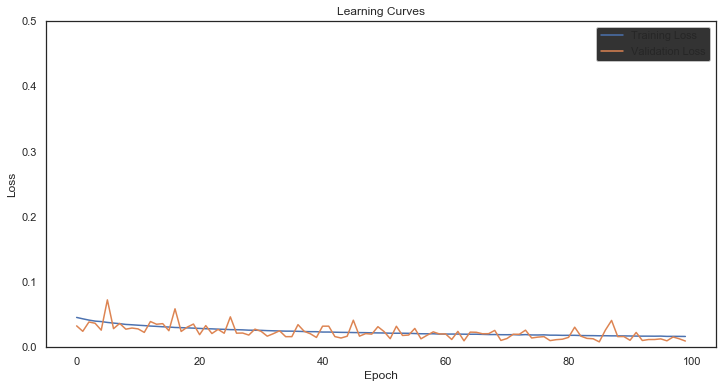

In [104]:
# Plot learning curves to detect overfitting
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.ylim(0,0.5)
plt.legend()
plt.show()

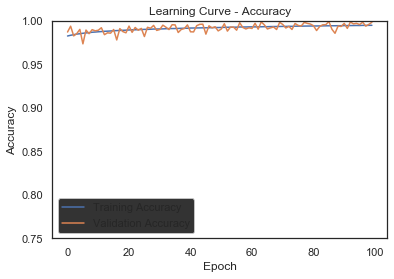

In [105]:
# Plot the learning curve for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Accuracy')
plt.ylim(0.75,1)
plt.legend()
plt.show()

In [106]:
# Predict classes for test set
y_pred = nn.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

In [107]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.svm import SVC


In [108]:
# Define class labels
class_labels = ['On-Time', 'Delayed', 'Cancelled']

# Convert y_test to labels
y_test_labels = [class_labels[idx] for idx in y_test]

# Convert y_pred_classes to labels
y_pred_labels = [class_labels[idx] for idx in y_pred_classes]

In [109]:
# Get a count of each disposition to ensure the classes are captured
from collections import Counter

count = Counter(y_test_labels)
count


Counter({'On-Time': 498002, 'Delayed': 293712, 'Cancelled': 23950})

In [110]:
# Print Classification Report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels, labels=class_labels))

Classification Report:
              precision    recall  f1-score   support

     On-Time       1.00      1.00      1.00    498002
     Delayed       1.00      1.00      1.00    293712
   Cancelled       1.00      1.00      1.00     23950

    accuracy                           1.00    815664
   macro avg       1.00      1.00      1.00    815664
weighted avg       1.00      1.00      1.00    815664



In [111]:
# Export our model to HDF5 file
# nn.save('filename.h5')